In [3]:
import pandas as pd
from model.core import run_simulation
from configs.dg10_nashir_light_combo import get_config

cfg = get_config()
state, round_log = run_simulation(cfg, with_log=True)

total = (
    state.dmg_basic
    + state.dmg_flame
    + state.dmg_breath
    + state.dmg_bolt
    + state.dmg_other
    + state.dmg_artifact
)

print("=== DG 10★ + Nashir setup ===")
print(f"Total damage: {total:,.1f}")
print(f"  Basic : {state.dmg_basic:,.1f}")
print(f"  Flame : {state.dmg_flame:,.1f}")
print(f"  Breath: {state.dmg_breath:,.1f}")
print(f"  Bolt  : {state.dmg_bolt:,.1f}")
#print(f"  Other : {state.dmg_other:,.1f}")
print(f"  Artifact : {state.dmg_artifact:,.1f}")
print(f"Avg per round: {total / cfg.rounds:,.1f}")
print("=== DG 10★ + Nashir + Tome (base) ===")


df_round = pd.DataFrame(round_log)
df_round


=== DG 10★ + Nashir setup ===
Total damage: 516,724,114.3
  Basic : 2,646,453.6
  Flame : 27,027,162.0
  Breath: 16,033,392.0
  Bolt  : 369,955,773.7
  Artifact : 101,061,333.0
Avg per round: 34,448,274.3
=== DG 10★ + Nashir + Tome (base) ===


,round,basic,flame,breath,bolt,other
0,1,99981.0,955874.25,1420434.0,1.060191e+07,0.0
1,2,152145.0,1831484.25,0.0,1.545716e+07,0.0
2,3,152145.0,1393679.25,2004174.0,3.818636e+07,0.0
3,4,199092.6,2225508.75,0.0,7.269023e+06,0.0
4,5,173880.0,1576098.00,2101464.0,1.702594e+07,0.0
5,6,199962.0,2232805.50,0.0,6.094934e+07,0.0
6,7,173880.0,1576098.00,2101464.0,1.745262e+07,0.0
7,8,199962.0,2232805.50,0.0,3.784216e+07,0.0
8,9,173880.0,1576098.00,2101464.0,3.788289e+07,0.0
9,10,199962.0,2232805.50,0.0,2.180832e+07,0.0


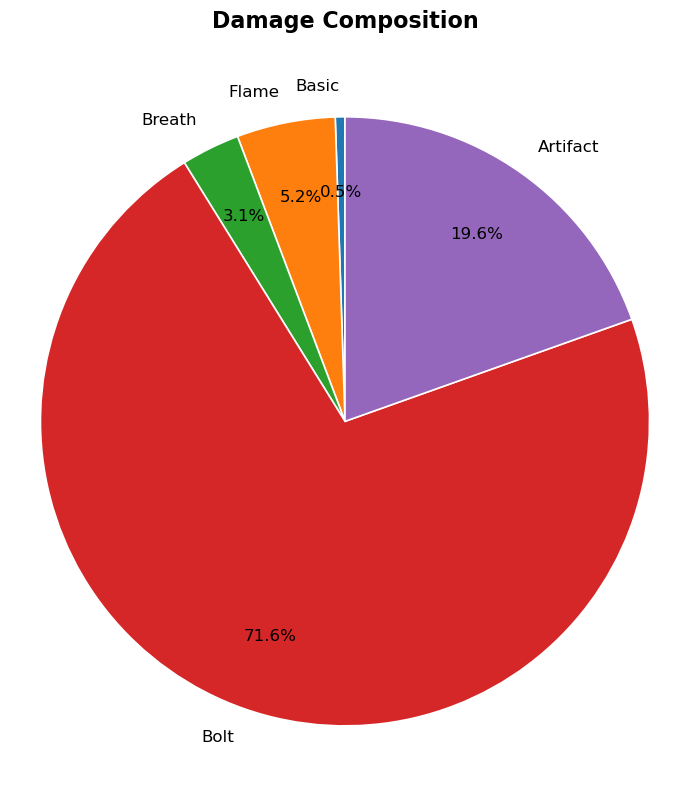

In [2]:
import matplotlib.pyplot as plt

# ----------------------------
# Prepare data
# ----------------------------
labels = ["Basic", "Flame", "Breath", "Bolt", "Artifact", "Other"]
values = [
    state.dmg_basic,
    state.dmg_flame,
    state.dmg_breath,
    state.dmg_bolt,
    state.dmg_artifact,
    state.dmg_other,
]

# Remove zeros
labels_clean = []
values_clean = []
for l, v in zip(labels, values):
    if v > 0:
        labels_clean.append(l)
        values_clean.append(v)

# ----------------------------
# Plot
# ----------------------------
fig, ax = plt.subplots(figsize=(7, 8))  # taller figure to shift pie down

# Move pie downward (center = (x, y))
wedges, texts, autotexts = ax.pie(
    values_clean,
    labels=labels_clean,
    autopct="%1.1f%%",             # <-- percent only
    startangle=90,
    pctdistance=0.75,
    textprops={'fontsize': 12},
    wedgeprops={"linewidth": 1.2, "edgecolor": "white"},
    center=(0.0, -0.10),           # <-- shift pie downward
)

# Clean title spacing (move title upward)
plt.title("Damage Composition", fontsize=16, fontweight='bold', pad=25)

ax.axis("equal")
plt.tight_layout()
plt.show()


In [1]:
import pandas as pd
# Import the simulator and helper functions
from model.core import (
    SimulationConfig,
    run_simulation,
    print_damage_breakdown,
)

from configs.leo10_test import cfg_leo_tome
# Run Leo 10★ + Tome
state_leo_tome, round_log_leo_tome = run_simulation(cfg_leo_tome, with_log=True)

# High-level damage split
print_damage_breakdown(state_leo_tome, adventurer="Leo")

# Optional: per-round view
print("\nPer-round damage:")
for row in round_log_leo_tome:
    print(row)


=== Damage breakdown for Leo ===
Total damage: 267479367.28
- bolt      : 146903835.28  ( 54.9%)
- artifact  :  42812550.00  ( 16.0%)
- ninjutsu  :  36467112.00  ( 13.6%)
- hurricane :  24940080.00  (  9.3%)
- ultimate  :  11865150.00  (  4.4%)
- basic     :   4490640.00  (  1.7%)

Per-round damage:
{'round': 1, 'basic': 299376.0, 'ninjutsu': 2057866.8000000003, 'hurricane': 2419560.0000000005, 'ultimate': 0.0, 'bolt': 2343463.848, 'other': 0.0}
{'round': 2, 'basic': 299376.0, 'ninjutsu': 1917036.0, 'hurricane': 0.0, 'ultimate': 0.0, 'bolt': 5849526.276000002, 'other': 0.0}
{'round': 3, 'basic': 299376.0, 'ninjutsu': 1978455.6, 'hurricane': 2419560.0000000005, 'ultimate': 1814670.0000000005, 'bolt': 13505956.991999991, 'other': 0.0}
{'round': 4, 'basic': 299376.0, 'ninjutsu': 2868729.5999999996, 'hurricane': 0.0, 'ultimate': 0.0, 'bolt': 5409640.367999986, 'other': 0.0}
{'round': 5, 'basic': 299376.0, 'ninjutsu': 2818477.1999999993, 'hurricane': 3350160.0, 'ultimate': 0.0, 'bolt': 1046

In [2]:
import pandas as pd

# 1) Turn debug logs into a DataFrame
df_hits = pd.DataFrame(state_leo_tome.debug_logs)

# 2) Filter to only bolt hits
df_bolts = df_hits[df_hits["tags"].apply(lambda t: "bolt" in t)]

# 3) Count bolts per round
bolt_counts = df_bolts.groupby("round")["damage"].count().to_dict()

print("\nPer-round damage (with bolt count):")
for row in round_log_leo_tome:
    r = row["round"]
    bolt_count = bolt_counts.get(r, 0)
    print({**row, "bolt_count": bolt_count})



Per-round damage (with bolt count):
{'round': 1, 'basic': 299376.0, 'ninjutsu': 2057866.8000000003, 'hurricane': 2419560.0000000005, 'ultimate': 0.0, 'bolt': 2343463.848, 'other': 0.0, 'bolt_count': 15}
{'round': 2, 'basic': 299376.0, 'ninjutsu': 1917036.0, 'hurricane': 0.0, 'ultimate': 0.0, 'bolt': 5849526.276000002, 'other': 0.0, 'bolt_count': 15}
{'round': 3, 'basic': 299376.0, 'ninjutsu': 1978455.6, 'hurricane': 2419560.0000000005, 'ultimate': 1814670.0000000005, 'bolt': 13505956.991999991, 'other': 0.0, 'bolt_count': 19}
{'round': 4, 'basic': 299376.0, 'ninjutsu': 2868729.5999999996, 'hurricane': 0.0, 'ultimate': 0.0, 'bolt': 5409640.367999986, 'other': 0.0, 'bolt_count': 13}
{'round': 5, 'basic': 299376.0, 'ninjutsu': 2818477.1999999993, 'hurricane': 3350160.0, 'ultimate': 0.0, 'bolt': 10461926.376000006, 'other': 0.0, 'bolt_count': 15}
{'round': 6, 'basic': 299376.0, 'ninjutsu': 2226305.4000000004, 'hurricane': 0.0, 'ultimate': 2512620.0000000005, 'bolt': 17712696.672000013, 'o

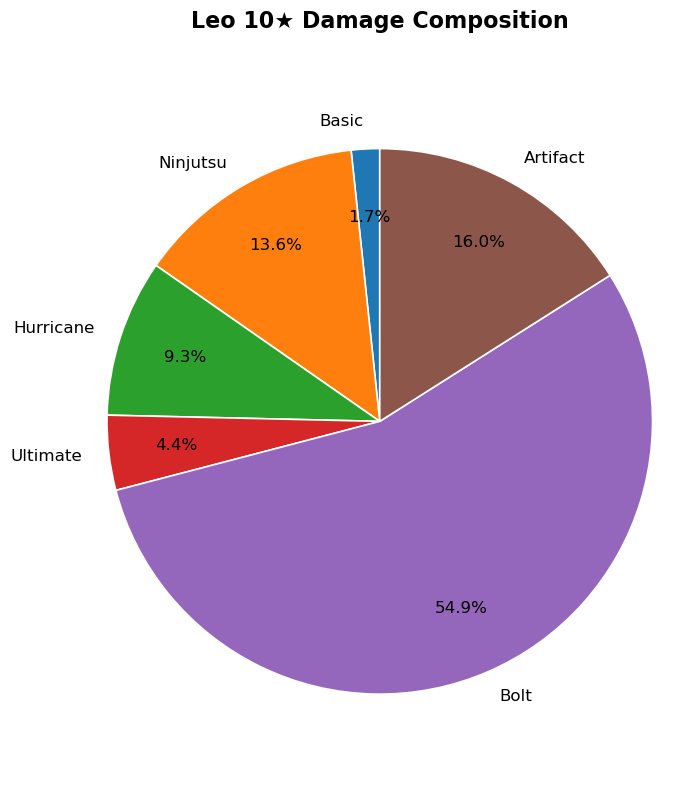

In [3]:
import matplotlib.pyplot as plt

# ---------------------------------------
# Prepare data for Leo
# ---------------------------------------
labels = ["Basic", "Ninjutsu", "Hurricane", "Ultimate", "Bolt", "Artifact", "Other"]
values = [
    state_leo_tome.dmg_basic,
    state_leo_tome.dmg_ninjutsu,
    state_leo_tome.dmg_hurricane,
    state_leo_tome.dmg_ultimate,
    state_leo_tome.dmg_bolt,
    state_leo_tome.dmg_artifact,
    state_leo_tome.dmg_other,
]

# Remove zero entries (clean display)
labels_clean = []
values_clean = []
for l, v in zip(labels, values):
    if v > 0:
        labels_clean.append(l)
        values_clean.append(v)

# ---------------------------------------
# Plot pie chart
# ---------------------------------------
fig, ax = plt.subplots(figsize=(7, 8))  # tall figure, same as DG version

wedges, texts, autotexts = ax.pie(
    values_clean,
    labels=labels_clean,
    autopct="%1.1f%%",
    startangle=90,
    pctdistance=0.75,
    textprops={'fontsize': 12},
    wedgeprops={"linewidth": 1.2, "edgecolor": "white"},
    center=(0.0, -0.10),    # Shift downward like DG plot
)

plt.title("Leo 10★ Damage Composition", fontsize=16, fontweight='bold', pad=25)

ax.axis("equal")
plt.tight_layout()
plt.show()


In [1]:
import pandas as pd
import matplotlib.pyplot as plt

from model.core import SimulationConfig, run_simulation

# ----------------------------
# Shared build for all stars
# (adjust to your liking)
# ----------------------------
base_cfg = dict(
    adventurer="Leo",
    weapon="Nashir",
    combo_mastery=False,

    # Lightning skills
    use_extra_end_bolts=True,
    extra_end_bolts_count=3,
    basic_atk_bolt_level=1,       # 1 = base, 2 = upgraded
    five_bolts_from_round6=False,

    # Battle settings
    rounds=15,
    basic_hits_per_round=5,
    seed=42,

    # Base multipliers (copy from your example)
    base_global_bonus=0.0,
    base_inbattle_bonus=0.0,
    base_final_bonus=0.26,
    base_global_skill_bonus=0.56,
    base_global_lightning_bonus=0.30,
    base_global_ninjutsu_bonus=0.0,
    base_global_combo_bonus=1.0,
    base_final_skill_bonus=0.15,
    base_final_lightning_bonus=0.25,
    base_inbattle_basic_bonus=0.0,
    base_inbattle_skill_bonus=0.0,
    base_inbattle_lightning_bonus=0.0,

    # Lightning Charge
    lightning_charge_step=0.0,     # off for this test
    multiple_lightning_factor=1,   # single-target

    # Ezra Ring
    use_ezra_ring=True,
    ezra_final_light_bonus=0.20,

    # Arcane Tome
    artifact="ArcaneTome",
    artifact_level=1,
)

# ----------------------------
# Run Leo for stars 0–10
# ----------------------------
rows = []

for star in range(0, 11):
    cfg = SimulationConfig(star=star, **base_cfg)
    state = run_simulation(cfg, with_log=False)

    # Extract components
    basic     = state.dmg_basic
    ninjutsu  = state.dmg_ninjutsu
    hurricane = state.dmg_hurricane
    ultimate  = state.dmg_ultimate
    bolt      = state.dmg_bolt
    artifact  = state.dmg_artifact
    other     = state.dmg_other

    total = basic + ninjutsu + hurricane + ultimate + bolt + artifact + other

    rows.append(
        dict(
            star=star,
            total_damage=total,
            basic=basic,
            ninjutsu=ninjutsu,
            hurricane=hurricane,
            ultimate=ultimate,
            bolt=bolt,
            artifact=artifact,
            other=other,
        )
    )

df_leo = pd.DataFrame(rows)
df_leo


,star,total_damage,basic,ninjutsu,hurricane,ultimate,bolt,artifact,other
0,0,1.706175e+08,4490640.0,9073350.0,0.0,0.0,1.142410e+08,42812550.0,0.0
1,1,1.706175e+08,4490640.0,9073350.0,0.0,0.0,1.142410e+08,42812550.0,0.0
2,2,1.914823e+08,4490640.0,29524836.0,0.0,0.0,1.146543e+08,42812550.0,0.0
3,3,1.914823e+08,4490640.0,29524836.0,0.0,0.0,1.146543e+08,42812550.0,0.0
4,4,1.975312e+08,4490640.0,29524836.0,6048900.0,0.0,1.146543e+08,42812550.0,0.0
5,5,1.975312e+08,4490640.0,29524836.0,6048900.0,0.0,1.146543e+08,42812550.0,0.0
6,6,1.975312e+08,4490640.0,29524836.0,6048900.0,0.0,1.146543e+08,42812550.0,0.0
7,7,2.108388e+08,4490640.0,29524836.0,19356480.0,0.0,1.146543e+08,42812550.0,0.0
8,8,2.162828e+08,4490640.0,29524836.0,19356480.0,5444010.0,1.146543e+08,42812550.0,0.0
9,9,2.162828e+08,4490640.0,29524836.0,19356480.0,5444010.0,1.146543e+08,42812550.0,0.0


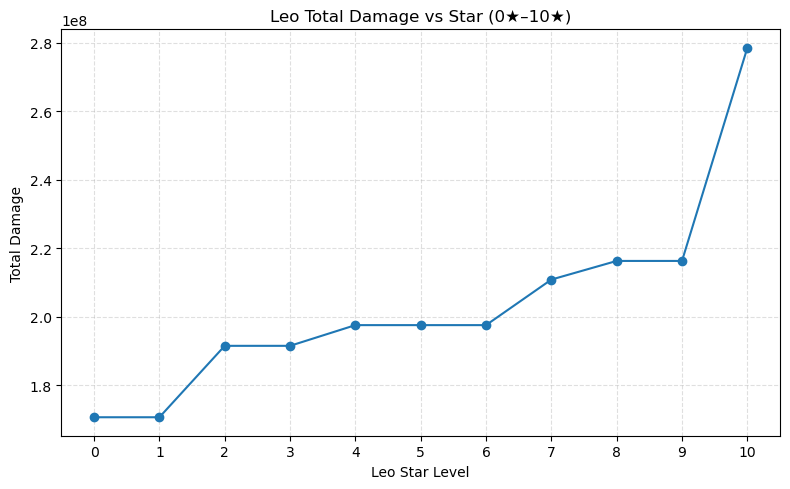

In [2]:
plt.figure(figsize=(8, 5))
plt.plot(df_leo["star"], df_leo["total_damage"], marker="o")
plt.xlabel("Leo Star Level")
plt.ylabel("Total Damage")
plt.title("Leo Total Damage vs Star (0★–10★)")
plt.grid(True, linestyle="--", alpha=0.4)
plt.xticks(df_leo["star"])
plt.tight_layout()
plt.show()


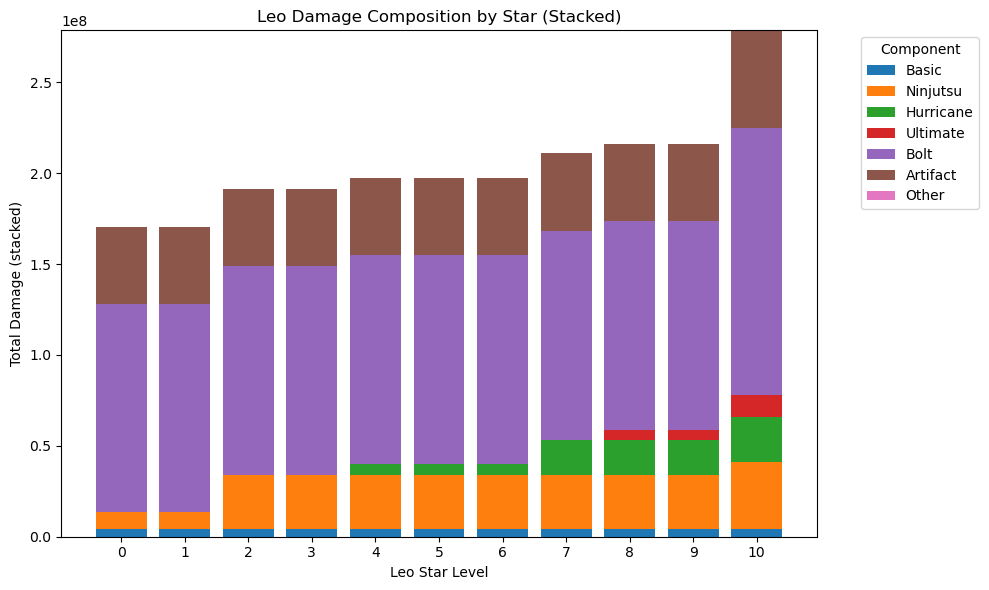

In [ ]:
# Components to stack
components = ["basic", "ninjutsu", "hurricane", "ultimate", "bolt", "artifact", "other"]

# X positions
x = df_leo["star"].values

plt.figure(figsize=(10, 6))

bottom = None
for comp in components:
    values = df_leo[comp].values
    if bottom is None:
        # First layer
        bars = plt.bar(x, values, label=comp.capitalize())
        bottom = values
    else:
        bars = plt.bar(x, values, bottom=bottom, label=comp.capitalize())
        bottom = bottom + values

plt.xlabel("Leo Star Level")
plt.ylabel("Total Damage (stacked)")
plt.title("Leo Damage Composition by Star (Stacked)")
plt.ylim(0, df_leo["total_damage"].max() * 1.05)
plt.xticks(x)
plt.legend(title="Component", bbox_to_anchor=(1.05, 1), loc="upper left")
plt.tight_layout()
plt.show()
